# Summary

**Action Points**

**1) Prioritize retention and risk mitigation in the "Online TA" segment**
This segment accounts for over 50% of all successful bookings, but has been more volatile in 2020 YTD, with a 6 p.p. drop in completion rate and a 32% rise in cancellations. Stabilising this segment is critical to maintaining overall booking volume and revenue consistency.

**2) Reassess strategy for the "Offline TA/TO" segment**
Despite an improvement in cancellations (-20%), the number of completed bookings for this segment has dropped 37%. This is the biggest contributor to the 2020 YTD reenue shortfall, as this segment makes up about 22% of successful bookings. Reviving it is a high priority. Ideas include increased engagement with travel agents, and reviwing of pricing and package offerings specific to this channel.

**3) Investigate root causes of longer lead times in general**
Whilst lead times for completed bookings have increased, so too have lead times for cancelled bookings, in 2020 YTD. This indicates potential fragility, and prevents us from confidently reaping benefits like longer-term revenue forecasting and maangement. It is worth exploring hypotheses such as that a previously introduced feature has unintentionally made reservations more tentative. This is likely to require more detailed operational knowledge and/or cross-functional input.

**Fly-by:**

1) YTD revenue 2018 far surpassed by equivalent-period 2019
2) (1) is mainly driven by increased number of bookings, not increased value of bookings
3) (2) is driven by (a) more bookings across both hotel types, especially city ones; (b) more bookings especially in market segment **"Online TA", but also "Offline TA/TO" and "Direct"**
4) YTD revenue 2020 almost matches that of equivalent-period 2019
5) (4) seems sustainable in the sense that month-by-month revenue is growing in 2020, so is not just a temporary boost due to extranous factors
6) In 2020 and 2019 alike, those 3 important market segments in (3) contributed roughly the same amounts proportionally to total (completed) bookings per year
7) However, number of bookings by secondary key segment "Offline TA/TO" decreased 37% in 2020 YTD vs 2019 YTD - _action point 2_
8) We may be encouraged by longer average lead times in 2020 vs 2019, indicating confidence by customers in making advanced bookings, and suggesting opportunities for more assured revenue management and forecasting. This is true for all 3 major segments
9) However, the lead time of cancelled bookings increased too, again for all 3 major segments, so there are fragilities to be wary of. This factor offsets the optimism offered in (8) - _action point 3_
10) (9) is especially noteworthy given the completion rate of bookings fell and actual number of cancellations rose in general, and most apparently in the key segment "Online TA" - _action point 1_

# Preamble

Dataset outline: 2018 - 2020 bookings for Hotel portfolio
https://absentdata.com/data-analysis/where-to-find-data/

High-level findings and recommendations:


Summary of concerns and assumptions:
1) Assume SC meals - presumably self-catered - have not had their price written in error, despite somehow costing more than full-board
2) Assume 'adr' := avg daily rate is to be multiplied by days stayed for room rental revenue per booking
3) Assume meals are applied to every non-baby guest in the same booking
4) Assume Null children --> 0 children
5) Assume no money made from cancelled bookings
6) Assume bookings of zero pax are unsuable data
7) Assume bookings with zero adr (avg daily rate) yet which are not cancelled are unusable data

# Prelim

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [88]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_excel(r"D:\Code\Data Analysis\01\hotel_revenue_historical_full-2.xlsx", sheet_name = None)

In [4]:
# Dimension table 1
# Typically would assume SC := self-catered --> cheaper
# Seems not the case this time. Raise concern of error, but go along with it (do not drop SC or any such action)

df_meal_cost = df['meal_cost']
df_meal_cost

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [52]:
# Dimension table 2
# Note discounted price would be price * (1 - discount)

df_market_segment = df['market_segment']
df_market_segment

,Discount,market_segment
0,0.00,Undefined
1,0.10,Direct
2,0.10,Groups
3,0.15,Corporate
4,0.20,Aviation
5,0.30,Offline TA/TO
6,0.30,Online TA
7,1.00,Complementary


In [53]:
# df_main := fact table of actual bookings by customers
# Concat sheets, having verified in source that columns match
df_main = pd.concat([df['2018'], df['2019'], df['2020']])
pd.set_option("display.max.columns", 50)
df_main[df_main["is_canceled"] == 0].head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
7951,Resort Hotel,0,342,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2018-07-01
7952,Resort Hotel,0,737,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2018-07-01
7953,Resort Hotel,0,7,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2018-07-02
7954,Resort Hotel,0,13,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2018-07-02
7955,Resort Hotel,0,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2018-07-03
7956,Resort Hotel,0,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2018-07-03
7957,Resort Hotel,0,0,2018,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2018-07-03
7958,Resort Hotel,0,9,2018,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2018-07-03
7959,Resort Hotel,0,35,2018,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,145.0,0,0,Check-Out,2018-07-05
7960,Resort Hotel,0,68,2018,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,NaN,0,Transient,97.0,0,3,Check-Out,2018-07-05


In [54]:
# Verify all rows from each year loaded in
df_main.groupby(df_main["arrival_date_year"]).size()

arrival_date_year
2018    21996
2019    79264
2020    40687
dtype: int64

In [55]:
# Any dupes?
# 41191
# df_main[df_main.duplicated()]
len(df_main[df_main.duplicated()])
# !! Improve booking system, website UI, staff training to stop so many input errors

41191

In [56]:
df_main.drop_duplicates(inplace=True)
len(df_main[df_main.duplicated()])

0

In [57]:
df_main.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              8
babies                                0
meal                                  0
country                             561
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             14539
company                           94595


In [58]:
# Assumption: null children = 0. Need non-null to convert to int (from float)
df_main["children"] = df_main["children"].fillna(value = 0)

In [59]:
df_main["arrival_date_month"] = pd.to_datetime(df_main["arrival_date_month"], format = "%B").dt.month
df_main["children"] = df_main["children"].astype(np.int64)
df_main.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int32
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [60]:
df_main["pax"] = df_main.adults + df_main.children + df_main.babies

In [61]:
df_main = df_main[df_main["pax"] != 0]
df_main.groupby("pax").size()
# absent deeper knowledge on booking system, assume 0 pax bookings are in error / not usable

pax
1     18970
2     66028
3     11060
4      4314
5       156
6         2
10        4
12        3
20        4
26       10
27        4
40        2
50        2
55        2
dtype: int64

In [62]:
# 2,117 entries are not cancelled yet have adr (avg daily rate) of 0
# Absent more detailed knowledge of subject matter, assume these unusable
# Even if these are explained by e.g. vouchers and perks, there is no alternate column to demonstrate this anyway
df_main = df_main[~((df_main["adr"] == 0) & (df_main["is_canceled"] == 0))]
df_main.groupby([(df_main["adr"] == 0) & (df_main["is_canceled"] == 0)]).size()

False    98666
dtype: int64

In [63]:
# After slicing,
# e.g. df_main = df_main[~((df_main["adr"] == 0) & (df_main["is_canceled"] == 0))],
# Pandas does not necessarily create a totally new df_main, rather just a shallow copy, or even just a view
# So later when e.g. adding new columns, Pandas not sure if applying to original or view, and changes may or may not exist
# Therefore make a deep copy
df_main = df_main.copy()


## Meta Observations

1) Some years of data are incomplete --> best to compare on a normalised basis e.g. per month. Or, YTD - for most recent performances at least


In [64]:
df_main.groupby("arrival_date_year")["arrival_date_month"].nunique()

arrival_date_year
2018     6
2019    12
2020     8
Name: arrival_date_month, dtype: int64

In [65]:
df_months_per_year = df_main.groupby("arrival_date_year", as_index = False)["arrival_date_month"].nunique().rename(columns = {"arrival_date_month" : "count_months_covered"})
df_months_per_year

,arrival_date_year,count_months_covered
0,2018,6
1,2019,12
2,2020,8


# Revenue Analysis

## Revenue Analysis Prelim

In [ ]:
# adr := avg daily rate
# Assumption: [revenue per booking = days * adr]; days = nights + 1

df_main["nights"] = df_main["stays_in_week_nights"] + df_main["stays_in_weekend_nights"]
df_main[["nights", "stays_in_week_nights", "stays_in_weekend_nights"]].head(10)

,nights,stays_in_week_nights,stays_in_weekend_nights
0,3,3,0
1,3,3,0
2,4,4,0
3,7,5,2
4,10,8,2
5,4,3,1
6,4,3,1
7,4,3,1
8,5,3,2
9,7,5,2


In [68]:
# Revenue associated with booking of rooms
df_main["room_revenue"] = (df_main["nights"] + 1) * df_main["adr"]
df_main[["room_revenue", "nights", "adr"]].head(10)

,room_revenue,nights,adr
0,328.00,3,82.00
1,422.00,3,105.50
2,615.00,4,123.00
3,856.00,7,107.00
4,1191.30,10,108.30
5,544.00,4,108.80
6,544.00,4,108.80
7,544.00,4,108.80
8,706.86,5,117.81
9,1224.00,7,153.00


In [69]:
# Revenue associated with associated meal system
# Assume that 'SC' meals - presumably self-catered - are not priced in error, despite somehow being more expensive that full-board FB meals
# Assume meals apply per night per non-baby pax - unlikely, but there is a lack of information on exact approach used
# Contrast to adr not being applied per pax, but to the booking as a whole
df_meal_cost

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [70]:
df_main = pd.merge(df_main, df_meal_cost, on = "meal", how = "left").merge(df_market_segment, on = "market_segment").rename(columns = {"Cost" : "meal_cost", "Discount" : "discount"})
df_main.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,pax,nights,room_revenue,meal_cost,discount
0,Resort Hotel,1,85,2018,7,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2018-05-06,2,3,328.00,12.99,0.3
1,Resort Hotel,1,75,2018,7,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2018-04-22,2,3,422.00,17.99,0.3
2,Resort Hotel,1,23,2018,7,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.00,0,0,Canceled,2018-06-23,2,4,615.00,12.99,0.3
3,Resort Hotel,1,60,2018,7,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.00,0,2,Canceled,2018-05-11,2,7,856.00,12.99,0.3
4,Resort Hotel,1,96,2018,7,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.30,0,2,Canceled,2018-05-29,2,10,1191.30,12.99,0.1
5,Resort Hotel,1,45,2018,7,27,2,1,3,3,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,241.0,NaN,0,Transient,108.80,0,1,Canceled,2018-05-19,3,4,544.00,12.99,0.3
6,Resort Hotel,1,40,2018,7,27,2,1,3,3,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,241.0,NaN,0,Transient,108.80,0,1,Canceled,2018-06-19,3,4,544.00,12.99,0.3
7,Resort Hotel,1,43,2018,7,27,2,1,3,3,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,241.0,NaN,0,Transient,108.80,0,0,Canceled,2018-05-23,3,4,544.00,12.99,0.3
8,Resort Hotel,1,45,2018,7,27,2,2,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,241.0,NaN,0,Transient,117.81,0,0,Canceled,2018-05-18,2,5,706.86,12.99,0.3
9,Resort Hotel,1,47,2018,7,27,2,2,5,2,2,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,153.00,0,0,Canceled,2018-06-02,4,7,1224.00,12.99,0.3


In [71]:

df_main["meal_revenue"] = df_main.nights * df_main.meal_cost * (df_main.pax - df_main.babies)
df_main[["meal_revenue", "nights", "pax", "babies", "meal_cost"]].head(10)


,meal_revenue,nights,pax,babies,meal_cost
0,77.94,3,2,0,12.99
1,107.94,3,2,0,17.99
2,103.92,4,2,0,12.99
3,181.86,7,2,0,12.99
4,259.80,10,2,0,12.99
5,155.88,4,3,0,12.99
6,155.88,4,3,0,12.99
7,155.88,4,3,0,12.99
8,129.90,5,2,0,12.99
9,363.72,7,4,0,12.99


In [76]:
# Assume discount applied to overall price of booking
# Assume no revenue at all collected for cancellation

# if df_main["is_canceled"] == 1:
#     df_main["booking_revenue"] = 0
# elif df_main["is_canceled"] == 0:
#     df_main["booking_revenue"] = round(((df_main.meal_revenue + df_main.room_revenue) * (1 - df_main.discount)), 2)
# Above doesn't work as the if conditions produce a series (each row - is the condition True or False?),
# but we instead want to be processing the logic row by row

# df_main["booking_revenue"] = np.where(df_main["is_canceled"] == 1, 0, (df_main.meal_revenue + df_main.room_revenue) * (1 - df_main.discount))
# df_main["booking_revenue"] = round(df_main["booking_revenue"], 2)

# Although booking revenue assumed zero for cancelled, still calculate the would-be revenue, to enable a view on unmaterialised / lost revenue

df_main["booking_revenue"] = (df_main.meal_revenue + df_main.room_revenue) * (1 - df_main.discount)

df_main[["is_canceled", "booking_revenue", "meal_revenue", "room_revenue", "discount"]].head(10)


,is_canceled,booking_revenue,meal_revenue,room_revenue,discount
0,1,284.158,77.94,328.00,0.3
1,1,370.958,107.94,422.00,0.3
2,1,503.244,103.92,615.00,0.3
3,1,726.502,181.86,856.00,0.3
4,1,1305.990,259.80,1191.30,0.1
5,1,489.916,155.88,544.00,0.3
6,1,489.916,155.88,544.00,0.3
7,1,489.916,155.88,544.00,0.3
8,1,585.732,129.90,706.86,0.3
9,1,1111.404,363.72,1224.00,0.3


In [86]:
df_main_complete = df_main[df_main.is_canceled == 0]
df_main_cancelled = df_main[df_main.is_canceled == 1]
print(len(df_main_complete))
print(len(df_main_cancelled))


71907
26759


## Revenue Analysis 1 - Overview

### Direct comparison

In [89]:
df_main_complete.groupby("arrival_date_year", as_index = False)["booking_revenue"].sum()

,arrival_date_year,booking_revenue
0,2018,4413791.59
1,2019,16715206.16
2,2020,10247926.05


In [ ]:
# Naturally, 2020 would appear to be lagging behind due to incomplete year. Best to compare YTD and revenue per month

### YTD 2019 vs 2020

In [90]:
# Check to be sure we end on August 31, and don't have to instead select a particular day
df_main[(df_main.arrival_date_month == 8) &(df_main.arrival_date_year == 2020)].groupby("arrival_date_month")["arrival_date_day_of_month"].max()

arrival_date_month
8    31
Name: arrival_date_day_of_month, dtype: int64

In [94]:
df_2019_vs_2020 = df_main_complete[(df_main_complete.arrival_date_month < 9) & df_main_complete.arrival_date_year.between(2019, 2020)].reset_index(drop = True)
df_YTD_2020_revenue = df_2019_vs_2020.groupby(["arrival_date_year"])["booking_revenue"].sum().reset_index().rename(columns = {"arrival_date_year" : "YTD"})
df_YTD_2020_revenue

,YTD,booking_revenue
0,2019,10322659.20
1,2020,10247926.05


In [ ]:
print(df_YTD_2020_revenue["booking_revenue"].loc[1] - df_YTD_2020_revenue["booking_revenue"].loc[0])
print((df_YTD_2020_revenue["booking_revenue"].loc[1] - df_YTD_2020_revenue["booking_revenue"].loc[0]) / df_YTD_2020_revenue["booking_revenue"].loc[0])

# The % change in equivalent time period 2020 vs 2019 is 'only' -0.72%
# Arguably this is not a huge issue, but probably still worth investigating, but first look into 2018 YTD vs 2019 YTD

-74733.15399999917
-0.007239719197032113


### YTD 2018 vs 2019

In [101]:
# Check to be sure we start on July 01, and don't have to instead select a particular day

print(df_main["arrival_date_month"][(df_main.arrival_date_year == 2018)].min())

df_main[(df_main.arrival_date_month == 7) &(df_main.arrival_date_year == 2018)].groupby("arrival_date_month")["arrival_date_day_of_month"].min()

7


arrival_date_month
7    1
Name: arrival_date_day_of_month, dtype: int64

In [105]:
df_2018_vs_2019 = df_main_complete[(df_main.arrival_date_month > 7) & df_main.arrival_date_year.between(2018, 2019)].reset_index(drop = True)
df_YTD_2018_revenue = df_2018_vs_2019.groupby(["arrival_date_year"])["booking_revenue"].sum().reset_index().rename(columns = {"arrival_date_year" : "YTD"})
df_YTD_2018_revenue

C:\Users\danie\AppData\Local\Temp\ipykernel_16720\1142299106.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018_vs_2019 = df_main_complete[(df_main.arrival_date_month > 7) & df_main.arrival_date_year.between(2018, 2019)].reset_index(drop = True)


,YTD,booking_revenue
0,2018,3674602.03
1,2019,9456315.03


In [ ]:
print(df_YTD_2018_revenue["booking_revenue"].loc[1] - df_YTD_2018_revenue["booking_revenue"].loc[0])
print((df_YTD_2018_revenue["booking_revenue"].loc[1] - df_YTD_2018_revenue["booking_revenue"].loc[0]) / df_YTD_2018_revenue["booking_revenue"].loc[0])

# The % change in equivalent time period 2019 vs 2018 is +157.3%

5781712.998499999
1.5734256259817916


### Revenue per Month from completed bookings, 2018 - 2020

In [ ]:
df_revenue = df_main_complete.groupby(["arrival_date_year", "arrival_date_month", "hotel"], as_index = False)["booking_revenue"].sum().rename(columns = {"booking_revenue" : "revenue_per_ym_by_type"})
df_revenue = df_revenue.merge(df_months_per_year, on = "arrival_date_year")

# Split by hotel type:
df_revenue["revenue_per_y_by_type"] = df_revenue.groupby(["arrival_date_year", "hotel"])["revenue_per_ym_by_type"].transform("sum")
df_revenue["avg_revenue_per_m_by_y_by_type"] = round(((df_revenue["revenue_per_y_by_type"] / df_revenue["count_months_covered"])), 2)

# Irrespective of hotel type:
df_revenue["revenue_per_ym"] = df_revenue.groupby(["arrival_date_year", "arrival_date_month"])["revenue_per_ym_by_type"].transform("sum")
df_revenue["revenue_per_y"] = df_revenue.groupby("arrival_date_year")["revenue_per_ym_by_type"].transform("sum")
df_revenue["avg_revenue_per_m_by_y"] = round(((df_revenue["revenue_per_y"] / df_revenue["count_months_covered"])), 2)

# (Check sums before col drop)
df_revenue.drop(["count_months_covered", "revenue_per_y", "revenue_per_y_by_type"], axis = 1, inplace=True)
df_revenue

,arrival_date_year,arrival_date_month,hotel,revenue_per_ym_by_type,avg_revenue_per_m_by_y_by_type,revenue_per_ym,avg_revenue_per_m_by_y
0,2018,7,City Hotel,40302.49,278807.65,739189.56,735631.93
1,2018,7,Resort Hotel,698887.07,456824.28,739189.56,735631.93
2,2018,8,City Hotel,277292.71,278807.65,1162261.43,735631.93
3,2018,8,Resort Hotel,884968.72,456824.28,1162261.43,735631.93
4,2018,9,City Hotel,519083.43,278807.65,1010757.35,735631.93
5,2018,9,Resort Hotel,491673.92,456824.28,1010757.35,735631.93
6,2018,10,City Hotel,418468.79,278807.65,711300.96,735631.93
7,2018,10,Resort Hotel,292832.17,456824.28,711300.96,735631.93
8,2018,11,City Hotel,178414.51,278807.65,347703.96,735631.93
9,2018,11,Resort Hotel,169289.45,456824.28,347703.96,735631.93


In [108]:
df_revenue_agg = df_revenue[["arrival_date_year", "avg_revenue_per_m_by_y"]].drop_duplicates().reset_index(drop = True)
df_revenue_agg

,arrival_date_year,avg_revenue_per_m_by_y
0,2018,735631.93
1,2019,1392933.85
2,2020,1280990.76


In [ ]:
# Pandas chart, just for the sake of it
# pd_bar_1 = df_revenue_agg.plot(kind = "bar", x = "arrival_date_year", y = "avg_revenue_per_m_by_y", figsize = (4, 6), title = "Average Revenue per Month by Year", legend = None, rot = 0, xlabel = "Year", ylabel = "USD (M)")

# pd_bar_1.get_yaxis().get_offset_text().set_visible(False)
# # Suppress the '1e6' label top left

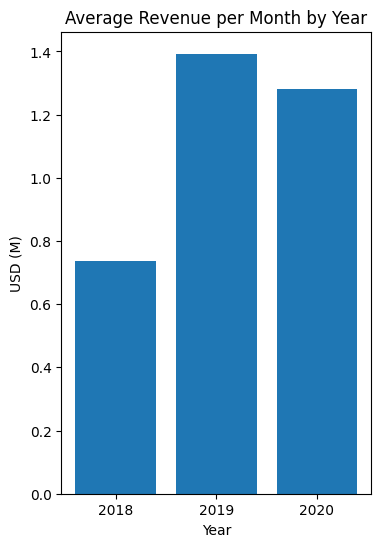

In [110]:
ax = plt.subplots(figsize=(4, 6))[1]
# plt.subplots() creates tuple with (figure object, axes object), so we assign 'ax' to be the axes object
# In another instance, we may instead have wanted to done assigment: fig, ax = plt.subplots(), therefore assigning fig = figure object and ax = axes object
ax.get_yaxis().get_offset_text().set_visible(False)
# suppress the '1e6' top left label
plt.bar(df_revenue_agg['arrival_date_year'], df_revenue_agg['avg_revenue_per_m_by_y'])
plt.xticks(df_revenue_agg['arrival_date_year'])
plt.xlabel("Year")
plt.title("Average Revenue per Month by Year")
plt.ylabel("USD (M)")
# plt.grid(visible = True, axis = "y")
plt.show()


We now see graphically that average revenue from completed bookings per month was comparable in 2019 and 2020, but dramatically less in 2018

Revenue Analysis Section 1 wrap-up:<br>
1) Avg revenue per month grew drastically 2018 - 19.<br>
2) Avg revenue per month then declined slightly YoY 2020

To investigate:
- Drivers of growth 2019 vs 2018.
- Did these same drivers maintain in 2020, or did different combinations come into play?
- Attempt to drive insights into whether 2019 and 2020 high relative performance are sustainable or volatile

## Revenue Analysis 2 - Drivers 2019 vs 2018

### Diagnose number of (completed) bookings vs value of (completed) bookings

In [189]:
df_2018_bookings = df_2018_vs_2019.groupby(["arrival_date_year", "arrival_date_month"]).size().reset_index(name="bookings")

# df_2018_bookings = df_2018_bookings.merge(df_revenue, on = ["arrival_date_year", "arrival_date_month"])[["arrival_date_year", "arrival_date_month", "revenue_per_ym", "bookings"]].drop_duplicates()
# df_2018_bookings["revenue_per_booking"] = df_2018_bookings.revenue_per_ym / df_2018_bookings.bookings
# df_2018_bookings = df_2018_bookings.pivot(index = "arrival_date_month", columns = "arrival_date_year", values = ["bookings", "revenue_per_booking"])
# df_2018_bookings[("bookings", "num_bookings_delta")] = df_2018_bookings[("bookings", 2019)] - df_2018_bookings[("bookings", 2018)]
# df_2018_bookings[("revenue_per_booking", "booking_rev_delta")] = df_2018_bookings[("revenue_per_booking", 2019)] - df_2018_bookings[("revenue_per_booking", 2018)]
# df_2018_bookings = df_2018_bookings.sort_index(axis=1, level=0)

df_2018_bookings_pivot = df_2018_bookings.pivot(index = "arrival_date_month", columns = "arrival_date_year", values = "bookings")
df_2018_bookings_pivot.columns.name = "bookings"
df_2018_bookings_pivot["abs_delta"] = df_2018_bookings_pivot[2019] - df_2018_bookings_pivot[2018]
df_2018_bookings_pivot["pc_delta"] = (df_2018_bookings_pivot[2019] - df_2018_bookings_pivot[2018]) / df_2018_bookings_pivot[2018]
df_2018_bookings_pivot.loc["YTD", [2018, 2019, "abs_delta"]] = df_2018_bookings_pivot.sum()
df_2018_bookings_pivot.loc["YTD", ["pc_delta"]] = df_2018_bookings_pivot.mean()
df_2018_bookings_pivot

bookings,2018,2019,abs_delta,pc_delta
arrival_date_month,,,,
8,1801.00,4739.00,2938.00,1.63
9,2192.00,4920.00,2728.00,1.24
10,2170.00,5118.00,2948.00,1.36
11,1365.00,3802.00,2437.00,1.79
12,1519.00,3574.00,2055.00,1.35
YTD,9047.00,22153.00,13106.00,1.47


The revenue gain 2019 vs 2018 is driven strongly by more bookings

In [192]:
df_2018_bookings_rev = df_2018_vs_2019.groupby(["arrival_date_year", "arrival_date_month"])["booking_revenue"].sum().reset_index(name = "booking_revenue")

df_2018_bookings_rev = df_2018_bookings_rev.merge(df_2018_bookings, on = ["arrival_date_year", "arrival_date_month"])
# df_2018_bookings_rev # check columns ok

df_2018_bookings_rev["revenue_per_booking"] = df_2018_bookings_rev.booking_revenue / df_2018_bookings.bookings
df_2018_bookings_rev = df_2018_bookings_rev[["arrival_date_year", "arrival_date_month", "revenue_per_booking"]]

df_2018_bookings_rev_pivot = df_2018_bookings_rev.pivot(index = "arrival_date_month", columns = "arrival_date_year", values = "revenue_per_booking")
df_2018_bookings_rev_pivot.columns.name = "revenue_per_booking"

df_2018_bookings_rev_pivot["abs_delta"] = df_2018_bookings_rev_pivot[2019] - df_2018_bookings_rev_pivot[2018]
df_2018_bookings_rev_pivot["pc_delta"] = (df_2018_bookings_rev_pivot[2019] - df_2018_bookings_rev_pivot[2018]) / df_2018_bookings_rev_pivot[2018]
df_2018_bookings_rev_pivot.loc["YTD", [2018, 2019]] = df_2018_bookings_rev_pivot.sum()
df_2018_bookings_rev_pivot.loc["YTD", ["pc_delta", "abs_delta"]] = df_2018_bookings_rev_pivot.mean()

df_2018_bookings_rev_pivot

revenue_per_booking,2018,2019,abs_delta,pc_delta
arrival_date_month,,,,
8,645.34,646.50,1.16,0.00
9,461.11,467.67,6.56,0.01
10,327.79,354.31,26.52,0.08
11,254.73,295.30,40.57,0.16
12,291.36,323.31,31.95,0.11
YTD,1980.33,2087.10,21.35,0.07


The revenue gain 2019 vs 2018 is driven weakly by more valuable bookings

As the 2019 vs 2018 difference is more obviously driven by number of bookings, rather than value of bookings, prioritise looking into this aspect

### Investigate drivers of number of (completed) bookings

#### By Hotel Type

In [211]:
df_2018_bookings_hotel = df_2018_vs_2019.groupby(["hotel", "arrival_date_year", "arrival_date_month"]).size().reset_index(name = "bookings")
# df_bookings_hotel
df_2018_bookings_hotel_pivot = df_2018_bookings_hotel.pivot(index = "arrival_date_month", columns = ["hotel", "arrival_date_year"], values = "bookings")

df_2018_bookings_hotel_pivot[("City Hotel", "abs_delta")] = df_2018_bookings_hotel_pivot[("City Hotel", 2019)] - df_2018_bookings_hotel_pivot[("City Hotel", 2018)]
df_2018_bookings_hotel_pivot[("Resort Hotel", "abs_delta")] = df_2018_bookings_hotel_pivot[("Resort Hotel", 2019)] - df_2018_bookings_hotel_pivot[("Resort Hotel", 2018)]
df_2018_bookings_hotel_pivot[("City Hotel", "pc_delta")] = (df_2018_bookings_hotel_pivot[("City Hotel", 2019)] - df_2018_bookings_hotel_pivot[("City Hotel", 2018)]) / df_2018_bookings_hotel_pivot[("City Hotel", 2018)]
df_2018_bookings_hotel_pivot[("Resort Hotel", "pc_delta")] = (df_2018_bookings_hotel_pivot[("Resort Hotel", 2019)] - df_2018_bookings_hotel_pivot[("Resort Hotel", 2018)]) / df_2018_bookings_hotel_pivot[("Resort Hotel", 2018)]
df_2018_bookings_hotel_pivot = df_2018_bookings_hotel_pivot.sort_index(axis=1, level=0)

df_2018_bookings_hotel_pivot.loc["YTD", [("City Hotel", 2018), ("City Hotel", 2019), ("City Hotel", "abs_delta"), ("Resort Hotel", 2018), ("Resort Hotel", 2019), ("Resort Hotel", "abs_delta") ]] = df_2018_bookings_hotel_pivot.sum()
df_2018_bookings_hotel_pivot.loc["YTD", [("City Hotel", "pc_delta"), ("Resort Hotel", "pc_delta")]] = df_2018_bookings_hotel_pivot.mean()

df_2018_bookings_hotel_pivot

hotel              City Hotel                             Resort Hotel  \
arrival_date_year        2018     2019 abs_delta pc_delta         2018   
arrival_date_month                                                       
8                      816.00  2693.00   1877.00     2.30       985.00   
9                     1292.00  3070.00   1778.00     1.38       900.00   
10                    1218.00  2976.00   1758.00     1.44       952.00   
11                     633.00  2113.00   1480.00     2.34       732.00   
12                     747.00  1942.00   1195.00     1.60       772.00   
YTD                   4706.00 12794.00   8088.00     1.81      4341.00   

hotel                                          
arrival_date_year     2019 abs_delta pc_delta  
arrival_date_month                             
8                  2046.00   1061.00     1.08  
9                  1850.00    950.00     1.06  
10                 2142.00   1190.00     1.25  
11                 1689.00    957.00     1.31  
12                 1632.00    860.00     1.11  
YTD                9359.00   5018.00     1.16

Both hotel types contributed strongly to the increased number of bookings 2019 vs 2018.

#### By market segment

In [ ]:
# df_main[["market_segment", "distribution_channel"]].
# unique can't apply to a dataframe (only a column (series) within)
# So:
df_main[["market_segment", "distribution_channel"]].drop_duplicates().sort_values(by = "market_segment").reset_index(drop = True)

,market_segment,distribution_channel
0,Aviation,Corporate
1,Aviation,TA/TO
2,Complementary,Corporate
3,Complementary,Direct
4,Complementary,TA/TO
5,Corporate,TA/TO
6,Corporate,Corporate
7,Corporate,Direct
8,Direct,Undefined
9,Direct,Corporate


In [228]:
# df_main_trunc = df_main[["arrival_date_year", "arrival_date_month", "market_segment", "distribution_channel", "booking_revenue", "meal_revenue", "room_revenue", "discount"]][(df_main.is_canceled == 0) & (df_main.arrival_date_month < 9) & df_main.arrival_date_year.between(2019, 2020)].reset_index(drop = True)
# df_main_trunc.head(10)

df_2018_segments = df_2018_vs_2019.groupby(["market_segment", "arrival_date_year"]).size().reset_index(name = "bookings").sort_values(by = ["arrival_date_year", "market_segment"])
df_2018_segments_pivot = df_2018_segments.pivot(index = "market_segment", columns = "arrival_date_year", values = "bookings")
df_2018_segments_pivot.fillna(0, inplace = True)
df_2018_segments_pivot.fillna(0, inplace = True)
df_2018_segments_pivot["abs_delta"] = df_2018_segments_pivot[2019] - df_2018_segments_pivot[2018]
df_2018_segments_pivot["pc_delta"] = (df_2018_segments_pivot[2019] - df_2018_segments_pivot[2018]) / df_2018_segments_pivot[2018]
df_2018_segments_pivot

arrival_date_year,2018,2019,abs_delta,pc_delta
market_segment,,,,
Aviation,0.00,45.00,45.00,inf
Complementary,9.00,29.00,20.00,2.22
Corporate,694.00,1374.00,680.00,0.98
Direct,1586.00,3446.00,1860.00,1.17
Groups,799.00,1543.00,744.00,0.93
Offline TA/TO,2270.00,4585.00,2315.00,1.02
Online TA,3689.00,11131.00,7442.00,2.02


Market segments across the board contributed to the increased number of bookings 2018 vs 2019.<br>
Considering scale and % delta, "**Online TA**" was the most critical driver, followed by "Offline TA/TO" and "Direct".

## Revenue Analysis 3 - Drivers 2020 vs (2019 vs 2018)

I.e. we know the drivers of stronger performance in 2019 over 2018 were:
1) More bookings through both hotel types, arguably more so with City Hotels
2) More bookings through all market segments, particularly "**Online TA**", "Offline TA/TO" and "Direct"

Meanwhile, these were not particular strong drivers:
1) Value per bookings

So: given that 2020 YTD revenue performance has almost matched 2019,<br>
want to investigate behaviours going into 2020.<br>
E.g. market segments: did those key market segments continue to grow? Are there things to note about lead time, rate of cancellation, etc.?
E.g. hotels: has the same ratio of city:hotel maintained?

But first: see month by month shape of 2020 vs 2019 - look for flags e.g. was 'matching' YoY performance driven by extreme highs at first, and dampened by Covid, and therefore we should not expect EoY matching performance?

### Revenue Shape

In [246]:
df_2020_shape = df_2019_vs_2020.groupby(["arrival_date_year", "arrival_date_month"], as_index = False)["booking_revenue"].sum()
df_2020_shape_pivot = df_2020_shape.pivot(index = "arrival_date_month", columns = "arrival_date_year", values = "booking_revenue")
df_2020_shape_pivot.columns.name = "booking_revenue"
df_2020_shape_pivot

booking_revenue,2019,2020
arrival_date_month,,
1,327967.07,598245.79
2,576435.86,745794.02
3,866316.06,923295.93
4,939800.60,1245081.38
5,1068367.27,1372383.22
6,1141811.85,1480277.36
7,2338192.43,1871567.66
8,3063768.07,2011280.68


At a glance, revenue shapes in 2020 vs 2019 are largely similar, and revenue growth shows no signs of stopping 2020 YTD, in fact it is monotonically rising

### Market Segment Behaviour

#### Number of Bookings

In [ ]:
df_2020_segments = df_2019_vs_2020.groupby(["market_segment", "arrival_date_year"]).size().reset_index(name = "bookings").sort_values(by = ["arrival_date_year", "market_segment"])
df_2020_segments_pivot = df_2020_segments.pivot(index = "market_segment", columns = "arrival_date_year", values = "bookings")
df_2020_segments_pivot.fillna(0, inplace = True)
df_2020_segments_pivot["abs_delta"] = df_2020_segments_pivot[2020] - df_2020_segments_pivot[2019]
df_2020_segments_pivot["pc_delta"] = (df_2020_segments_pivot[2020] - df_2020_segments_pivot[2019]) / df_2020_segments_pivot[2018]
df_2020_segments_pivot

arrival_date_year,2019,2020,abs_delta,pc_delta
market_segment,,,,
Aviation,50,83,33,0.66
Complementary,18,11,-7,-0.39
Corporate,1286,1052,-234,-0.18
Direct,3755,3612,-143,-0.04
Groups,886,1080,194,0.22
Offline TA/TO,4793,3012,-1781,-0.37
Online TA,12358,12337,-21,-0.00


In [273]:
df_2020_segments_prop = df_2019_vs_2020.groupby(["market_segment", "arrival_date_year"]).size().reset_index(name = "bookings").sort_values(by = ["arrival_date_year", "market_segment"])
df_2020_segments_prop_pivot = df_2020_segments_prop.pivot(index = "market_segment", columns = "arrival_date_year", values = "bookings")
df_2020_segments_prop_pivot["2019_total"] = df_2020_segments_prop_pivot[2019].sum()
df_2020_segments_prop_pivot["2019_pc"] = df_2020_segments_prop_pivot[2019] / df_2020_segments_prop_pivot["2019_total"]
df_2020_segments_prop_pivot["2020_total"] = df_2020_segments_prop_pivot[2020].sum()
df_2020_segments_prop_pivot["2020_pc"] = df_2020_segments_prop_pivot[2019] / df_2020_segments_prop_pivot["2020_total"]
df_2020_segments_prop_pivot = df_2020_segments_prop_pivot[[2019, "2019_total", "2019_pc", 2020, "2020_total", "2020_pc"]]
df_2020_segments_prop_pivot.columns = pd.MultiIndex.from_tuples([("2019", "Count"), ("2019", "Total"), ("2019", "pc"), ("2020", "Count"), ("2020", "Total"), ("2020", "pc")])
df_2020_segments_prop_pivot

2019               2020            
                Count  Total   pc  Count  Total   pc
market_segment                                      
Aviation           50  23146 0.00     83  21187 0.00
Complementary      18  23146 0.00     11  21187 0.00
Corporate        1286  23146 0.06   1052  21187 0.06
Direct           3755  23146 0.16   3612  21187 0.18
Groups            886  23146 0.04   1080  21187 0.04
Offline TA/TO    4793  23146 0.21   3012  21187 0.23
Online TA       12358  23146 0.53  12337  21187 0.58

For 2020 YTD vs 2019, the proportion of total number of bookings accountable to each market segment was very comparable.<br>
Especially encouraging to see key segment "Online TA" hold strong, as well as "Direct".
However, in df_2020_segments_pivot we see that secondary key segment "Offline TA/TO" decreased 37% in 2020 YTD.<br>
This worse comparative performance of this segment was a large contributor to the overall shortfall in bookings.<br>
As Offline TA/TO commands approx 22% of leads, is worth bolstering support for this


#### Cancellations

In [324]:
# Create new dataframe that is agnsotic to cancelled or not
df_2019_vs_2020_all = df_main[(df_main.arrival_date_month < 9) & df_main.arrival_date_year.between(2019, 2020)].reset_index(drop = True)
df_2019_vs_2020_all.groupby("is_canceled").size()

is_canceled
0    44333
1    18344
dtype: int64

In [357]:
df_2020_segments_cancel = df_2019_vs_2020_all.groupby(["arrival_date_year", "market_segment"])["is_canceled"].sum().reset_index().rename(columns = {"is_canceled" : "num_cancelled"})
df_2020_segments_complete = df_2019_vs_2020.groupby(["arrival_date_year", "market_segment"]).size().reset_index().rename(columns = {0 : "num_completed"})
df_2020_segments_complete = df_2020_segments_cancel.merge(df_2020_segments_complete, on = ["arrival_date_year", "market_segment"])
df_2020_segments_complete["booked"] = df_2020_segments_complete["num_cancelled"] + df_2020_segments_complete["num_completed"]
df_2020_segments_complete["pc_complete"] = df_2020_segments_complete["num_completed"] / df_2020_segments_complete["booked"]
df_2020_segments_complete = df_2020_segments_complete[["arrival_date_year", "market_segment", "pc_complete"]]
df_2020_segments_complete_pivot = df_2020_segments_complete.pivot(index = "market_segment", columns = "arrival_date_year", values = "pc_complete")
df_2020_segments_complete_pivot.columns.name = "pc completed"
df_2020_segments_complete_pivot["delta p.p."] = df_2020_segments_complete_pivot[2020] - df_2020_segments_complete_pivot[2019]
df_2020_segments_complete_pivot

pc completed,2019,2020,delta p.p.
market_segment,,,
Aviation,0.79,0.80,0.00
Complementary,0.42,0.28,-0.14
Corporate,0.89,0.86,-0.03
Direct,0.86,0.85,-0.01
Groups,0.67,0.71,0.05
Offline TA/TO,0.86,0.82,-0.03
Online TA,0.67,0.60,-0.06


Completion rate of bookings fell across most customer segments, and especially worrying is that this was approx 6 percentage points for the major segment 'Online TA'

In [ ]:
# df_2020_segments_cancel["total_cancelled_per_y"] = df_2020_segments_cancel.groupby("arrival_date_year")["num_cancelled"].transform("sum")
df_2020_segments_cancel_pivot = df_2020_segments_cancel.pivot(index = "market_segment", columns = "arrival_date_year", values = "num_cancelled")
df_2020_segments_cancel_pivot.fillna(0, inplace = True)
df_2020_segments_cancel_pivot["delta"] = df_2020_segments_cancel_pivot[2020] - df_2020_segments_cancel_pivot[2019]
df_2020_segments_cancel_pivot["pc_delta"] = df_2020_segments_cancel_pivot["delta"] / df_2020_segments_cancel_pivot[2019]
df_2020_segments_cancel_pivot

arrival_date_year,2019,2020,delta,pc_delta
market_segment,,,,
Aviation,13.00,21.00,8.00,0.62
Complementary,25.00,28.00,3.00,0.12
Corporate,164.00,171.00,7.00,0.04
Direct,621.00,657.00,36.00,0.06
Groups,446.00,439.00,-7.00,-0.02
Offline TA/TO,800.00,639.00,-161.00,-0.20
Online TA,6167.00,8151.00,1984.00,0.32
Undefined,2.00,0.00,-2.00,-1.00


Now observe that actual number of cancellations by Online TA have increased 32%

#### Lead Time

Lead time := time between making of reservation and actual check-in date.<br>
Min = 0, Max = 709 ... assume means days

In [ ]:
# df_2019_vs_2020[df_2019_vs_2020.lead_time > 0].lead_time.min()
df_2019_vs_2020[df_2019_vs_2020.lead_time > 0].lead_time.max()

np.int64(709)

In [394]:
# pd.options.display.max_rows = 450
df_2019_vs_2020_all.groupby("lead_time", as_index = False).size()
# Take this to mean no outliers, so lead_time.mean() is valid

,lead_time,size
0,0,3855
1,1,2220
2,2,1329
3,3,1135
4,4,1083
...,...,...
435,608,2
436,615,2
437,622,2
438,629,2


In [395]:
# pd.options.display.max_rows = 50

In [396]:
df_2020_segments_lead = df_2019_vs_2020_all.groupby(["arrival_date_year", "is_canceled", "market_segment"])["lead_time"].mean().reset_index().rename(columns = {"lead_time" : "mean_lead_time"})

df_2020_segments_lead_pivot = df_2020_segments_lead.pivot(index= ["market_segment", "is_canceled"], columns = "arrival_date_year", values = "mean_lead_time")

df_2020_segments_lead_pivot["delta"] = df_2020_segments_lead_pivot[2020] - df_2020_segments_lead_pivot[2019]
df_2020_segments_lead_pivot["pc_delta"] = df_2020_segments_lead_pivot["delta"] / df_2020_segments_lead_pivot[2019]

df_2020_segments_lead_pivot.columns.name = "mean_lead_time"
df_2020_segments_lead_pivot

mean_lead_time               2019   2020  delta  pc_delta
market_segment is_canceled                               
Aviation       0             4.82   3.64  -1.18     -0.25
               1             7.92   2.33  -5.59     -0.71
Complementary  0            22.28  17.27  -5.01     -0.22
               1            16.52  12.36  -4.16     -0.25
Corporate      0            12.32  14.87   2.55      0.21
               1            16.98  32.89  15.92      0.94
Direct         0            43.17  56.63  13.46      0.31
               1            62.22  86.36  24.14      0.39
Groups         0           118.95 127.79   8.84      0.07
               1           178.95 179.22   0.27      0.00
Offline TA/TO  0            97.31 120.69  23.38      0.24
               1           117.62 157.90  40.28      0.34
Online TA      0            61.87  81.29  19.42      0.31
               1            84.18 120.84  36.66      0.44
Undefined      1             1.50    NaN    NaN       NaN

For those same important market segments, mean lead time has increased whether for cancellations or completed bookings.<br>
Longer lead time for completed bookings --> customers are more confident in their purchasing decision, so this bodes well - they are booking in advance.<br>

However, there is also a rising trend of customers that have booked far in advance (long lead time) and cancelled too.
Indeed, not only has "Online TA" increased in actual number of cancellations and decreased in % completed, but we can now see that their cancelled bookings have longer lead-times.<br>
This overall implies volatility in this market segment.<br>
Furthermore, perhaps consider early booking incentives for non-refundable rates